In [51]:
import numpy as np
import pandas as pd

from skimage import io
import face_recognition
import cv2
u
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

import keras

import random
import math

In [33]:
df=pd.read_csv('scraping youtube/metadata.csv',index_col=0)

In [34]:
df=df.T
df=df.reset_index(drop=True)

In [35]:
df.head()

,title,views,likes,dislikes,desc,id,clickbait
0,"Veterans' Voices 2020: General Joseph Votel, U...","22,540 views",92 likes,28 dislikes,"Veterans served their nation selflessly, but s...",K15jFOVrAy4,0
1,How To Make Tandoori Chicken,"1,724,176 views","93,482 likes","7,647 dislikes",Today I show you how to make authentic Tandoor...,lG3PEdw0xrU,1
2,25 Airbag Rainbow Explosion in 4K - The Slow M...,"6,431,213 views","185,758 likes","1,712 dislikes",Sometimes ideas get too big for our backyard s...,0vUgGSLTtOg,0
3,Hunting The SECRET MEGALODON BOSS In Minecraft!,"457,053 views","12,111 likes",386 dislikes,"If you enjoyed this video, watch more here: ht...",d17H1uhfYjw,1
4,Maroon 5 - Don't Wanna Know (Behind The Scenes),"1,050,911 views","27,807 likes",287 dislikes,"Buy “Don't Wanna Know"" ft. Kendrick LaMar now....",KTF1Nqvl8ug,0


In [36]:
def get_img(id):
    return mpimg.imread('scraping youtube/thumbs/'+id+'.jpg')

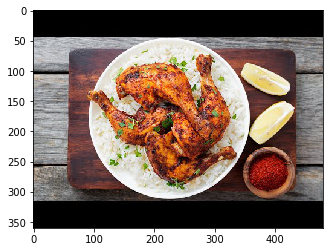

In [37]:
plt.imshow(get_img(df["id"][1]))

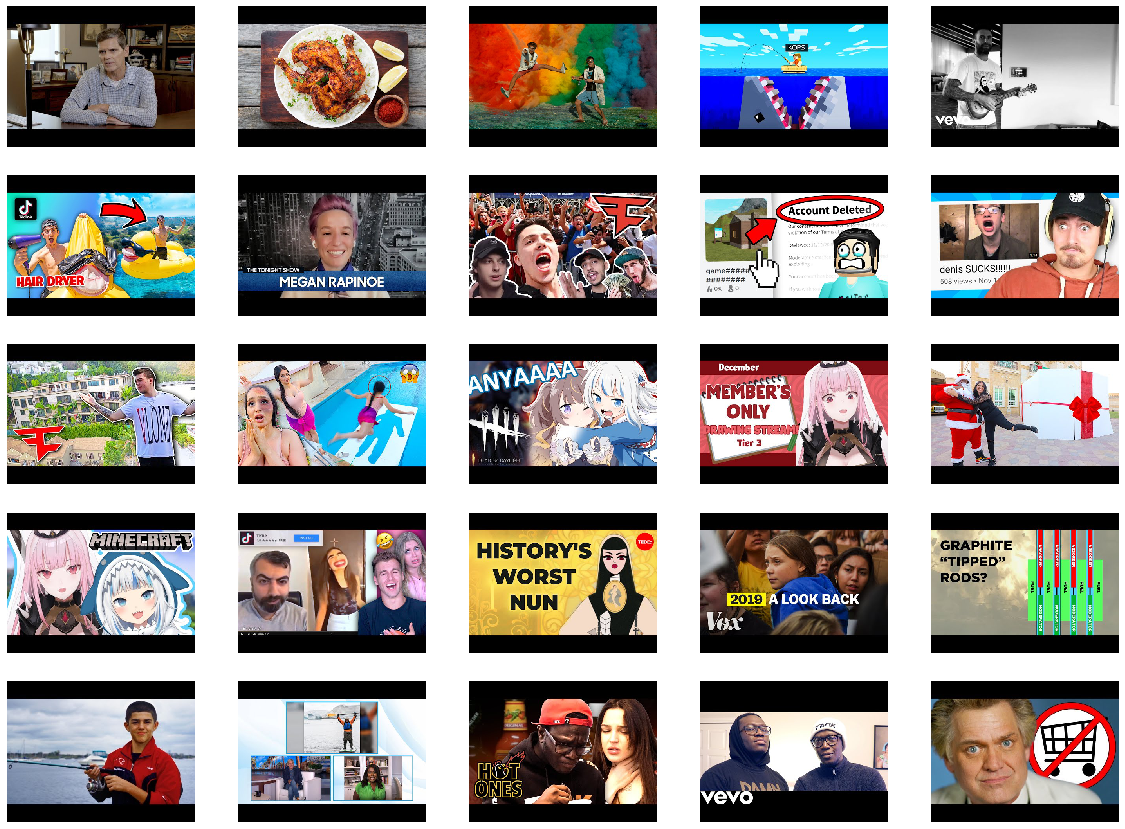

In [44]:
fig,axs=plt.subplots(5,5,figsize=(20,15))

for x in axs.ravel():
    x.axis('off')

for i in range(5):
    for j in range(5):
        axs[i,j].imshow(get_img(df["id"][i*5+j]))

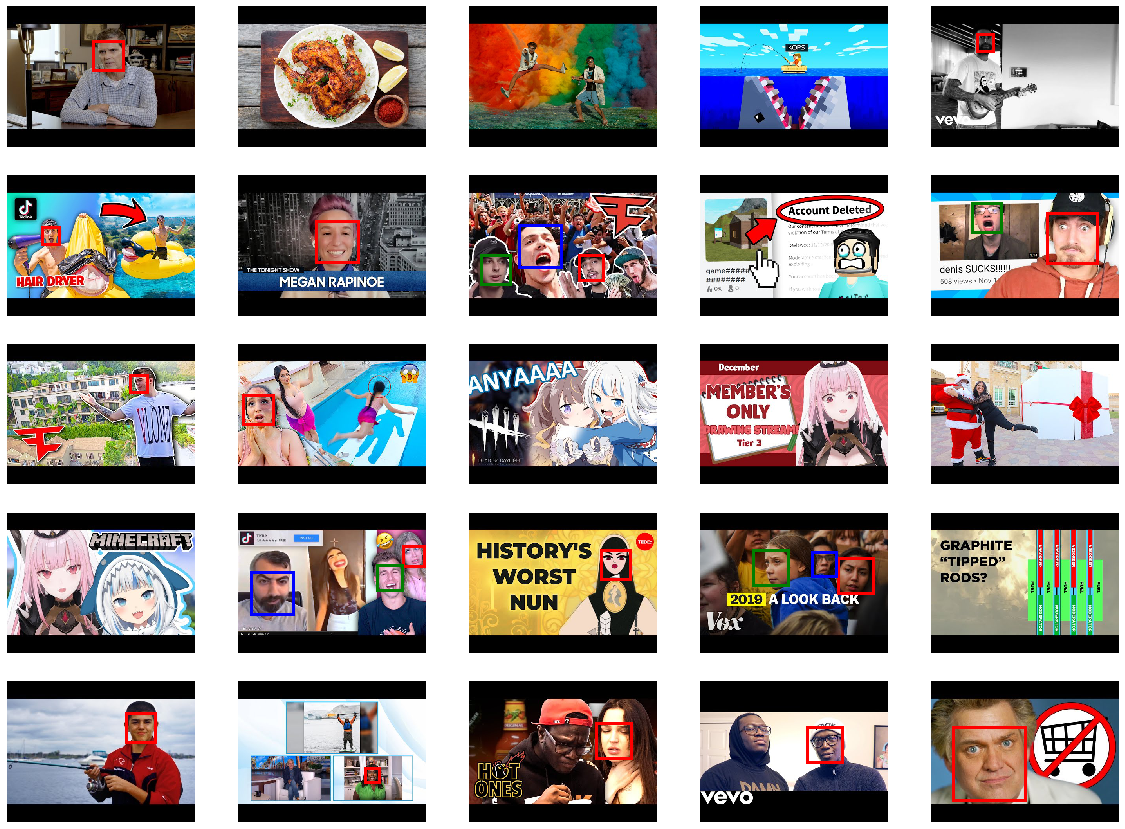

In [71]:
fig,axs=plt.subplots(5,5,figsize=(20,15))

for x in axs.ravel():
    x.axis('off')

for i in range(5):
    for j in range(5):
        img=get_img(df["id"][i*5+j])
        axs[i,j].imshow(img)
        
        locs=face_recognition.face_locations(img)
        
        for x in range(min(3,len(locs))):
            t,r,b,l=locs[x]
            
            rect=patches.Rectangle((l,t),r-l,b-t,linewidth=3,edgecolor="rgb"[x],facecolor='none')
            axs[i,j].add_patch(rect)